In [1]:
import os
from urllib import request 
from collections import defaultdict
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import joblib
import pandas as pd

mpl.rcParams['font.weight']='normal'
plt.rcParams['axes.labelweight'] = 'normal'
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams["font.size"] = 8
# sns.set_palette('Set1',4)
%matplotlib notebook

<IPython.core.display.Javascript object>


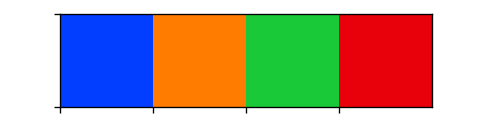

In [2]:
sns.palplot(sns.color_palette("bright", 4))

In [150]:
pal = sns.color_palette("bright", 4)
pal.as_hex()

['#023eff', '#ff7c00', '#1ac938', '#e8000b']

In [3]:
sns.color_palette("bright", 4)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784)]

<IPython.core.display.Javascript object>


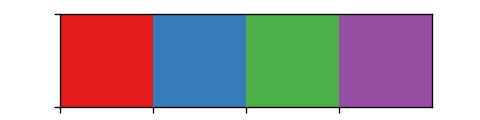

In [4]:
sns.palplot(sns.color_palette("Set1",4))

<IPython.core.display.Javascript object>


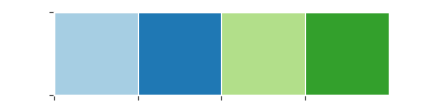

In [9]:
sns.palplot(sns.color_palette("Paired",4))

## Create a folder to save data files.

In [5]:
if not os.path.isdir('data'):
    os.makedirs('data')

In [6]:
def download_data(name_dir="data", filename="data.csv",
                  data_url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'):
    """ 
    Download both train and test dataset to a directory named "data". 

    If the directory doesn't exist, this function will create one. 

    Parameters
    ----------
    data_url : str, default 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'
        The URL of the location of the file.
    filename : str, default 'data.csv'
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    No return. Create a directory if needed and 
    download the file to that directory.
    """
    
    if not os.path.isdir(name_dir):
        os.makedirs(name_dir)

    data_path = os.path.join(name_dir, filename)

    # if file doesn't exist, download it.
    if not os.path.isfile(data_path):
        request.urlretrieve(data_url,data_path)

# https://stackoverflow.com/questions/25010369/wget-curl-large-file-from-google-drive
import requests

def download_file_from_google_drive(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value

        return None

    def save_response_content(response, destination):
        CHUNK_SIZE = 32768

        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def save_obj(obj, name, name_dir='data' ):
    """
    Save to pickle.
    
    Parameters
    ----------
    obj : any object 
        This can be a dictionary or ndarray.
    name : str
        The name for the object to be saved.
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    No return.
        Save the pickle object to the local file system.
    """
    
    if not os.path.isdir(name_dir):
        os.makedirs(name_dir)

    data_path = os.path.join(name_dir, name+'.pkl')
    
    with open(data_path, 'wb') as f:
        joblib.dump(obj, f)

def load_obj(name, gdrive_id, name_dir='data' ):
    """
    Load the pickle object from the local file system.
    
    Parameters
    ----------
    name : str
        The name for the object to be saved.
    gdrive_id : str
        The google drive id for the data.
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    object
        Return an object such as a dictionary.
    """
    data_path = os.path.join(name_dir, name+'.pkl')
    
    # if file doesn't exist, download it.
    if not os.path.isfile(data_path):
        download_file_from_google_drive(gdrive_id, data_path)
        
    with open(data_path, 'rb') as f:
        return joblib.load(f)
    
def nested_dict():
  """
  This returns a empty nestable dictionary.
  """
  return defaultdict(nested_dict)


## Download Preprocessed EMS Dispatch Data
- `df_ems` can be regenerated by using `data_preprocessing.ipynb`.

In [8]:
# Save data after filling missing values.
# save_obj(df_ems,'df_ems')
# https://drive.google.com/open?id=1OCt0jm--zCE_mTKAub_Ddo4W6BayKQ0B
df_ems = load_obj('df_ems','1OCt0jm--zCE_mTKAub_Ddo4W6BayKQ0B')
df_ems.head()

,Call_ID_Hash,SERVICE,PRIORITY,PRIORITY_DESC,AGENCY,CALL_QUARTER,CALL_YEAR,DESCRIPTION_SHORT,CITY_CODE,CITY_NAME,GEOID
0,336ba345f5a0,EMS,E0,EMS ALS life threatening response w/ backup,E620,Q1,2015,HEMORRHAGE,PVU,PORT VUE,420035003002
1,f59d50d394fa,EMS,E0,EMS ALS life threatening response w/ backup,E380,Q1,2015,UNCONSCIOUS,PEN,PENN HILLS,420035235011
2,8d56b4f6f9fe,EMS,E0,EMS ALS life threatening response w/ backup,E620,Q1,2015,UNCONSCIOUS,MCK,MCKEESPORT,420035523003
3,e20045d2f6b4,EMS,E0,EMS ALS life threatening response w/ backup,E050,Q1,2015,"GUNSHOT, STABBING, OR OTHER WOUND",PGH,PITTSBURGH,420031306003
4,dbe1c9db46f6,EMS,E0,EMS ALS life threatening response w/ backup,E050,Q1,2015,ASSAULT,PGH,PITTSBURGH,420031609002


## Download population dictionary
- `pop_dict` can be regenerated by using `data_preprocessing-EMS-population.ipynb`.

In [9]:
# load pop_dict from the local system.
# https://drive.google.com/open?id=1BkPpXY9Aq-rsC6WlhEaa4xTp-kMggoKl
pop_dict = load_obj('pop_dict','1BkPpXY9Aq-rsC6WlhEaa4xTp-kMggoKl')

In [10]:
def get_pop(x, **kwargs):
    pop_dict = kwargs['pop_dict']
    yr = kwargs['yr']
    if yr == 2018:
        yr = 2017
    return pop_dict[x][yr]

def get_call_per_city(df, pop_dict, yr):
    df_city_count =df[df['CALL_YEAR'] == yr]['CITY_NAME'].value_counts().reset_index()
    df_city_count.columns = ['CITY_NAME', 'NO. OF CALLS']
    df_city_count['PERCENTAGE OVER TOTAL CALLS'] = round(df_city_count['NO. OF CALLS']/
                                                         df_city_count['NO. OF CALLS'].sum()*
                                                         100,2)
    col_name = 'POPULATION'.format(yr=yr)
    df_city_count[col_name] = (df_city_count['CITY_NAME']
                               .apply(get_pop, pop_dict=pop_dict, yr = yr))
    
    df_city_count['CALL_PER_POP'] = (df_city_count['NO. OF CALLS']/
                                     df_city_count[col_name])
    # Sort the column
    df_city_count.sort_values(by=['CALL_PER_POP',col_name],
                              ascending=False,
                              inplace=True)
    
    return df_city_count
    
    

In [11]:
call_per_city_2015 = get_call_per_city(df_ems, pop_dict, 2015)
call_per_city_2015.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
19,HARRISON,1823,0.97,1011,1.803165
43,PINE,1039,0.55,744,1.396505
24,ELIZABETH TOWNSHIP,1645,0.87,1504,1.093750
32,RICHLAND,1397,0.74,1567,0.891512
4,ROSS,4700,2.49,5774,0.813994


In [12]:
call_per_city_2016 = get_call_per_city(df_ems, pop_dict, 2016)
call_per_city_2016.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
18,HARRISON,1995,1.02,1002,1.991018
50,PINE,991,0.51,743,1.333782
32,ELIZABETH TOWNSHIP,1490,0.76,1492,0.998660
4,ROSS,4755,2.44,5763,0.825091
37,RICHLAND,1251,0.64,1579,0.792274


In [13]:
call_per_city_2017 = get_call_per_city(df_ems, pop_dict, 2017)
call_per_city_2017.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
19,HARRISON,1979,1.01,994,1.990946
43,PINE,1088,0.55,738,1.474255
30,ELIZABETH TOWNSHIP,1588,0.81,1482,1.071525
4,ROSS,4686,2.38,5805,0.807235
38,RICHLAND,1261,0.64,1594,0.791092


In [14]:
call_per_city_2018 = get_call_per_city(df_ems, pop_dict, 2018)
call_per_city_2018.head()

,CITY_NAME,NO. OF CALLS,PERCENTAGE OVER TOTAL CALLS,POPULATION,CALL_PER_POP
19,HARRISON,1924,0.96,994,1.935614
45,PINE,1065,0.53,738,1.443089
27,ELIZABETH TOWNSHIP,1666,0.83,1482,1.124157
35,RICHLAND,1417,0.71,1594,0.888959
4,ROSS,4878,2.44,5805,0.840310


In [15]:
def Top_plot(df1, df2, df3, df4, pop_cutoff=0, top=10):
    city_names = []
    for df in [df1,df2,df3,df4]:
        city_names.extend(df1.iloc[:top,0].tolist())
    city_names = list(set(city_names))
    col_names = ['CITY_NAME', 'NO. OF CALLS', 
                 'POPULATION', 'CALL_PER_POP', 'YEAR']
    df_temp = pd.DataFrame(columns=col_names)
    for df, yr in zip([df1, df2, df3, df4],[2015, 2016, 2017, 2018]):
        df['YEAR'] = yr
        df_temp = df_temp.append(df[(df['CITY_NAME'].isin(city_names))
                                    & (df.iloc[:,3] > pop_cutoff)][col_names]
                                 .sort_values(by=['CALL_PER_POP','NO. OF CALLS'],
                                 ascending=False))
         
    return df_temp
    

In [16]:
Top_20_df = Top_plot(call_per_city_2015, call_per_city_2016, call_per_city_2017,call_per_city_2018,top=20)

In [17]:
def bar_plot(df,y='CALL_PER_POP',x='CITY_NAME',hue='YEAR'):
    plt.figure()
    with plt.style.context('ggplot'):
        sns.barplot(x=x, y=y, 
                    hue=hue, data=df, palette=sns.color_palette("bright", 4))
        plt.xticks(rotation=90)
    

<IPython.core.display.Javascript object>


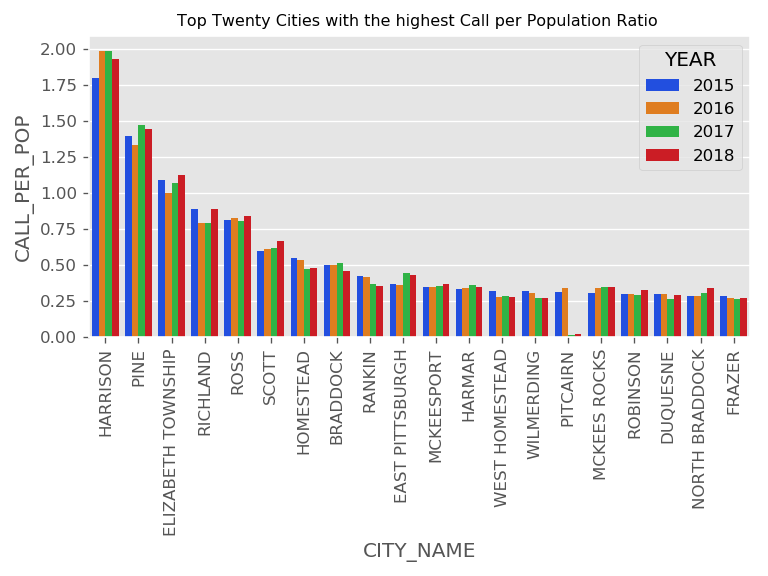

In [18]:
bar_plot(Top_20_df)
plt.title("Top Twenty Cities with the highest Call per Population Ratio ")
plt.tight_layout()

<IPython.core.display.Javascript object>


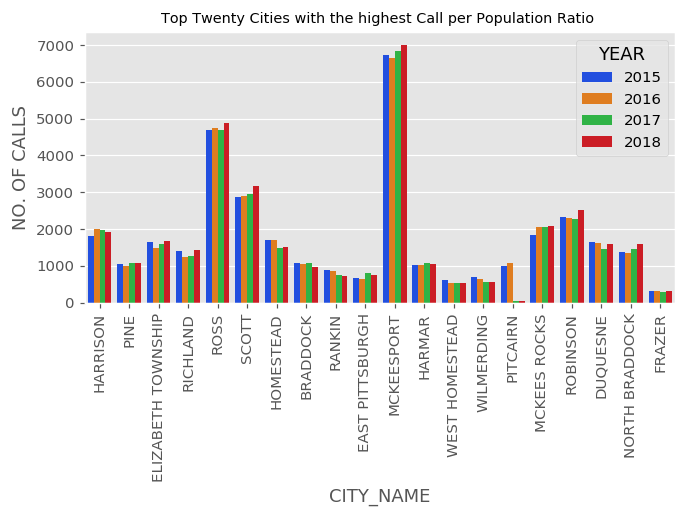

In [66]:
bar_plot(Top_20_df,'NO. OF CALLS')
plt.title("Top Twenty Cities with the highest Call per Population Ratio ")
plt.tight_layout()

<IPython.core.display.Javascript object>


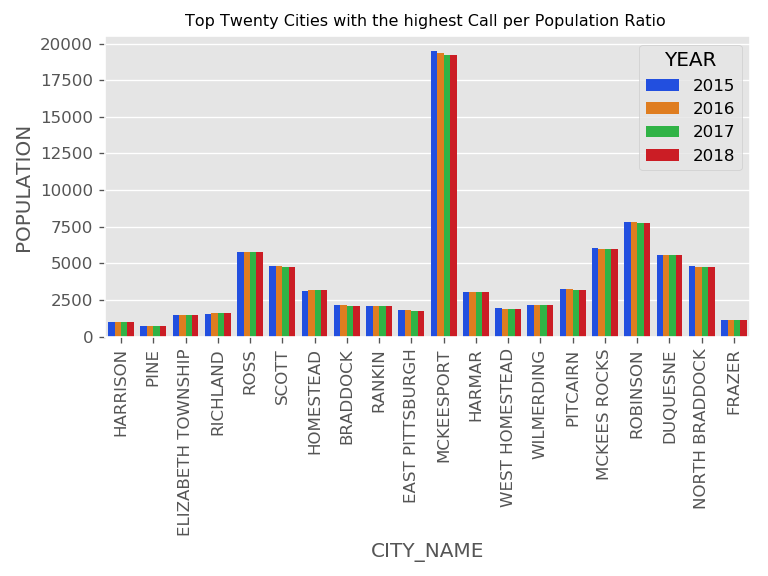

In [19]:
bar_plot(Top_20_df,'POPULATION')
plt.title("Top Twenty Cities with the highest Call per Population Ratio ")
plt.tight_layout()

In [69]:
Top_20_df_3000 = Top_plot(call_per_city_2015, 
                          call_per_city_2016, 
                          call_per_city_2017,
                          call_per_city_2018,
                          top=34,pop_cutoff=3000)

In [20]:
bar_plot(Top_20_df_3000)
plt.title("Top Twenty Cities with the highest Call per Population Ratio \n For City Population higher than 3000 ")
plt.tight_layout()

NameError: name 'Top_20_df_3000' is not defined

In [ ]:
bar_plot(Top_20_df_3000,'POPULATION')
plt.title("Top Twenty Cities with the highest Call per Population Ratio \n For City Population higher than 3000 ")
plt.tight_layout()

In [ ]:
bar_plot(Top_20_df_3000, 'NO. OF CALLS')
plt.title("Top Twenty Cities with the highest Call per Population Ratio \n For City Population higher than 3000 ")
plt.tight_layout()

In [21]:
df_ems_Q = df_ems.groupby(['CALL_QUARTER', 'CALL_YEAR']).size().reset_index(name='COUNT')
df_ems_Q.head()

,CALL_QUARTER,CALL_YEAR,COUNT
0,Q1,2015,47103
1,Q1,2016,46434
2,Q1,2017,48690
3,Q1,2018,49261
4,Q2,2015,47254


<IPython.core.display.Javascript object>


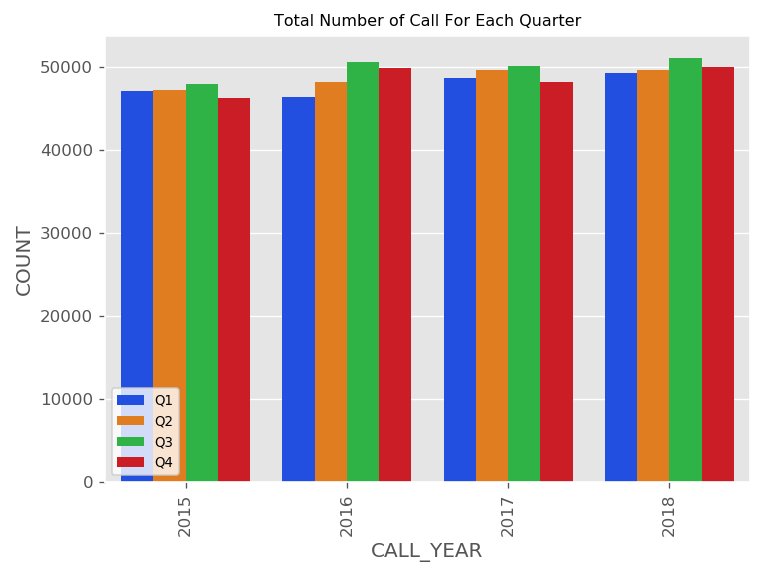

In [22]:
bar_plot(df_ems_Q,y='COUNT',x='CALL_YEAR',hue='CALL_QUARTER')
plt.legend(loc='lower left')
plt.title("Total Number of Call For Each Quarter")
plt.tight_layout()


In [25]:
def grid_bar_plot(df, col='CITY_NAME', x=['PITTSBURGH','HOMESTEAD', 'PINE']):
    nrow = int(round(len(x)/2,0))
    
    df_mod = dict()
    for name in x:
        df_mod[name] = (df[df[col] == name]
                        .groupby(['CALL_QUARTER', 'CALL_YEAR'])
                        .size().reset_index(name='COUNT'))
        
    
    with plt.style.context('ggplot'):
        fig, axes = plt.subplots(nrows=nrow, ncols=2, figsize=(8,4*nrow))
        fig.subplots_adjust(hspace = .1, wspace=.1)
        axes = axes.ravel()
        
        for ax, name in zip(axes, x):
            g = sns.barplot(x='CALL_YEAR', y='COUNT', hue='CALL_QUARTER',  
                            data=df_mod[name], ax = ax, 
                            palette=sns.color_palette("bright", 4))
            ax.legend_.remove()
            ax.set_title('EMS Call Per \n Quarter in {ct}'.format(ct=name))
#             ax.legend(loc='lower left')
#             g.fig.get_axes()[0].legend(loc='lower left')
#             g.set_xticklabels(g.get_xticklabels(), rotation=90)
#     plt.legend(loc='lower left')
        plt.tight_layout()

<IPython.core.display.Javascript object>


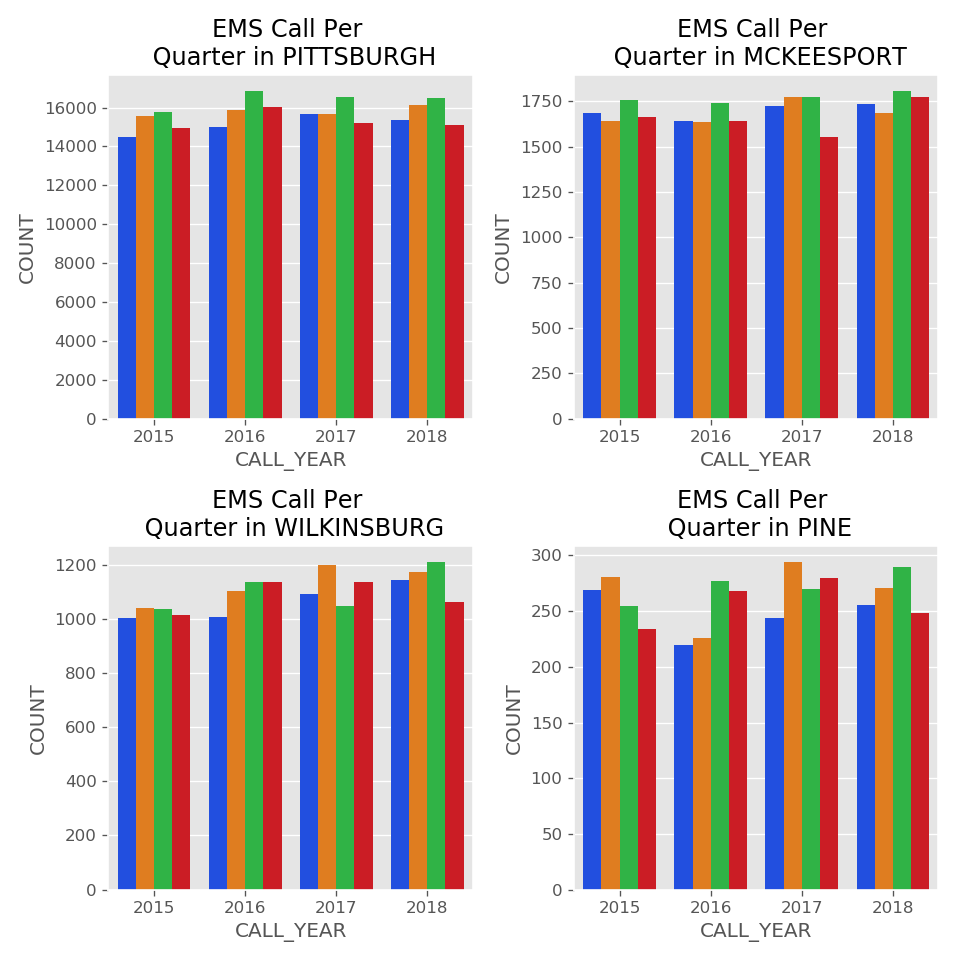

In [26]:
grid_bar_plot(df_ems,x=['PITTSBURGH','MCKEESPORT','WILKINSBURG','PINE'] )

<IPython.core.display.Javascript object>


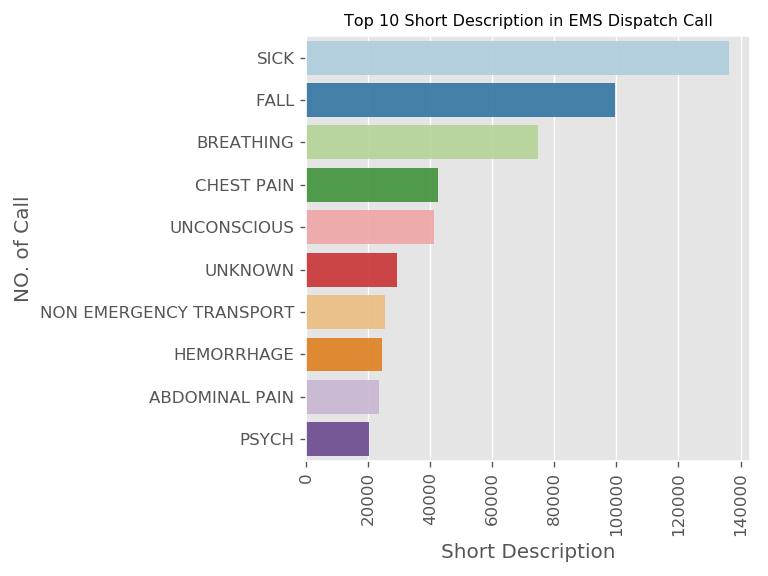

In [24]:
description_count = df_ems['DESCRIPTION_SHORT'].value_counts()
description_count = description_count[:10,]
plt.figure()
with plt.style.context('ggplot'):
    sns.barplot(description_count.values,
                description_count.index, alpha=0.9,
                palette=sns.color_palette('Paired'))
plt.xticks(rotation=90)
plt.title("Top 10 Short Description in EMS Dispatch Call")
plt.ylabel("NO. of Call")
plt.xlabel("Short Description")
plt.tight_layout()

<IPython.core.display.Javascript object>


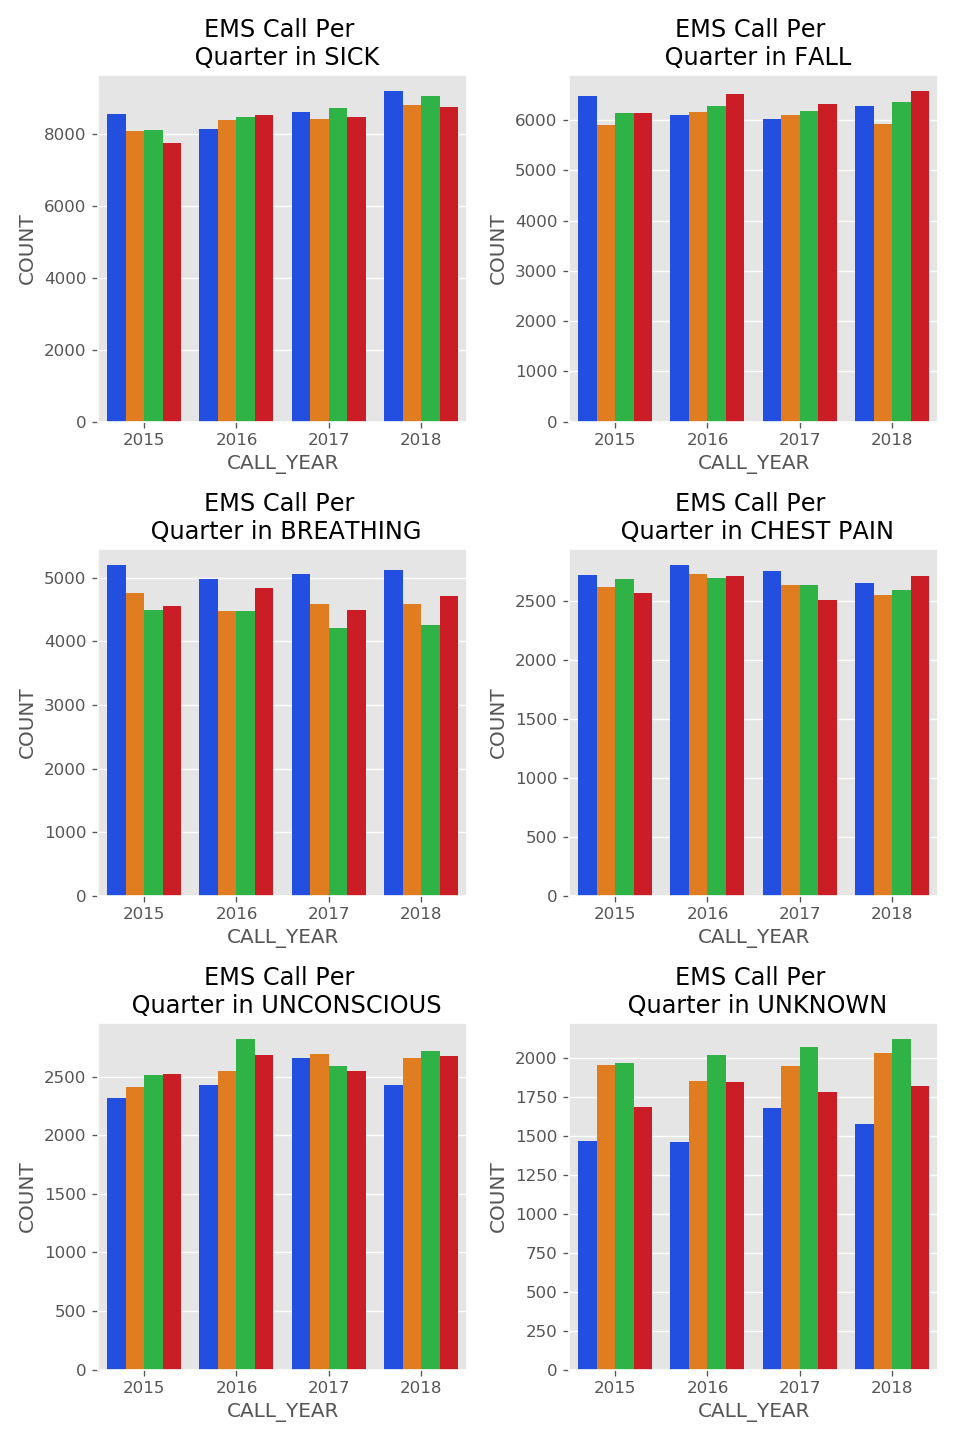

In [27]:
grid_bar_plot(df_ems, col='DESCRIPTION_SHORT', x=['SICK','FALL','BREATHING','CHEST PAIN','UNCONSCIOUS','UNKNOWN'])